In [2]:
from IPython.display import Image

import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

def display_graphics(g):
    g.save("/tmp/test.png")
    return Image("/tmp/test.png")

#latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
import sage.all as sg

In [4]:
from flowstar.reachability import *
# flowstar.reachability must be imported before sage otherwise
# sage breaks the flow* yacc parser

In [5]:
from lbuc.bondcalculus import *

In [6]:
import os

In [7]:
!pwd

/home/twright/Drive/Documents/PhD/Notebooks/notebooks/Reachability


In [8]:
m = BondModel("../../models/plantclock.biocpi")

Running cmd: 'load "../../models/plantclock.biocpi"' ...


In [9]:
p = BondProcess("Pi", m); p

BondProcess('Pi', <lbuc.bondcalculus.BondModel object at 0x7fd66e582e50>)

In [10]:
s = p.as_system; s
#s = System.load_from_script('/tmp/bond-sage-script-l0s67857.py'); s

Running cmd: 'savesage "Pi" "/tmp/bond-sage-script-b88n5xlp.py"' ...


System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13), [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], (0, -0.3000000000000000?*x1 + x10, 0, 0.640000000000000?*x13 - 0.560000000000000?*x3, -0.3800000000000000?*x4 + x8, -0.680000000000000?*x5 + 1.180000000000000?*x9, 0, 0, -0.570000000000000?*x8 + 1.50000000000000/(0.277008310249308?*x3^2.00000000000000 + 0.277008310249308?*x4^2.00000000000000 + 7.71604938271605?*x5^2.00000000000000 + 1), -0.530000000000000?*x9 + 7.600000000000000?/(39.0625000000000?*x1^2.00000000000000 + 0.694444444444445?*x3^2.00000000000000 + 1), -0.3500000000000000?*x10 + (1.50000000000000*x5^2.00000000000000/(x5^2.00000000000000 + 0.05760000000000000?) + 1.300000000000000?)/(18.90359168241966?*x3^2.00000000000000 + 11.11111111111111?*x4^2.00000000000000 + 1), 0, x7, -0.2400000000000000?*x13 + 1/(0.250000000000000?*x3^2.00000000000000 + 4.72589792060492?*x5^2.00000000000000 + 1)), varmap=bidict({'Gene(cCL,tCL,dMCL,dCL,iCL;)': x0, 'Protein(dP97,iP97;)': 

In [11]:
r = s.reach(45, order=3, step=(0.01,0.1))

str_odes = ['[0.000000000000000, 0.000000000000000]', '(x1)*([-0.300000000000001, -0.299999999999999]) + x10', '[0.000000000000000, 0.000000000000000]', '(x13)*([0.639999999999999, 0.640000000000001]) + (x3)*([-0.560000000000001, -0.559999999999999])', '(x4)*([-0.380000000000001, -0.379999999999999]) + x8', '(x5)*([-0.680000000000001, -0.679999999999999]) + (x9)*([1.17999999999999, 1.18000000000001])', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', '(x8)*([-0.570000000000001, -0.569999999999999]) + ([1.50000000000000, 1.50000000000000])/(((x3)^2.00000000000000)*([0.277008310249307, 0.277008310249308]) + ((x4)^2.00000000000000)*([0.277008310249307, 0.277008310249308]) + ((x5)^2.00000000000000)*([7.71604938271604, 7.71604938271606]) + [1.00000000000000, 1.00000000000000])', '(x9)*([-0.530000000000001, -0.529999999999999]) + ([7.59999999999999, 7.60000000000001])/(((x1)^2.00000000000000)*([39.0624999999999, 39.0625000000001]) + ((x3)^2.00000000000000)*

In [12]:
r(3)

[1,
 3.1?,
 1,
 0.266?,
 0.43?,
 2.48?,
 1,
 1,
 0.142?,
 0.99?,
 1.83?,
 1,
 3.000000000000?,
 0.256?]

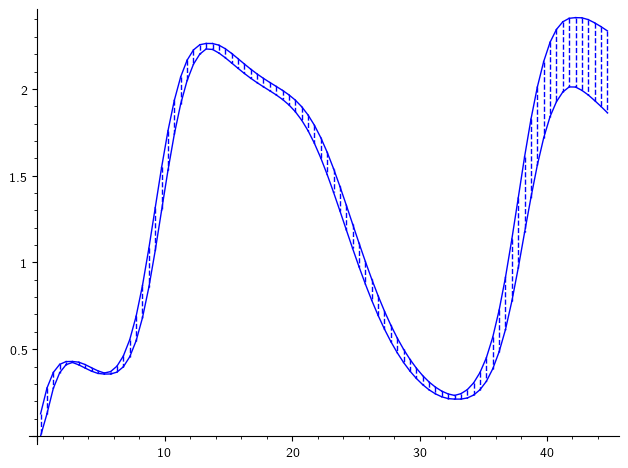

In [13]:
with suppress_stdout():
    g = r.sage_time_tube_plot(s.n("Protein(dEL,iEL;)"), 0.5, t=s.n('Time'))
    
display_graphics(g)

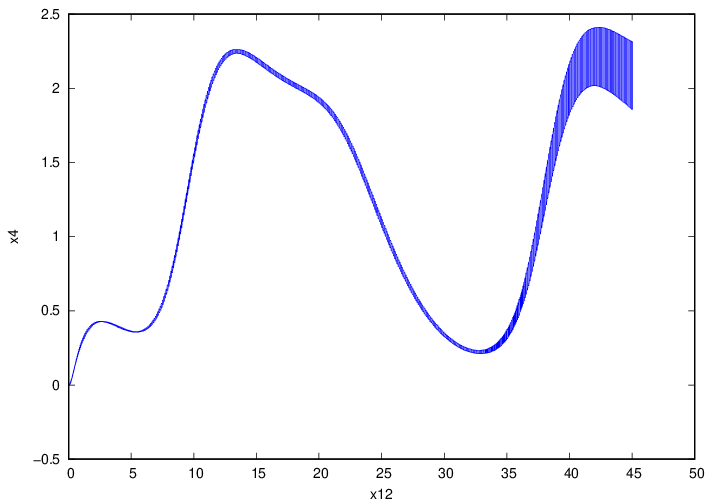

In [14]:
r.wplot(s.n('Time'), s.n("Protein(dEL,iEL;)"))

In [12]:
from lbuc.logic import *

In [13]:
s.PR

Multivariate Polynomial Ring in x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13 over Real Interval Field with 53 bits of precision

In [14]:
s.v("Protein(dEL,iEL;)").parent()

Symbolic Ring

In [15]:
at = Atomic(s.v("Protein(dEL,iEL;)") - 1.5); at

Atomic(x4 - 1.50000000000000)

In [16]:
#g = at.sage_plot(r)

In [17]:
#display_graphics(g)

In [18]:
g = at.visualize(s, 45, tentative_unpreconditioning=False)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

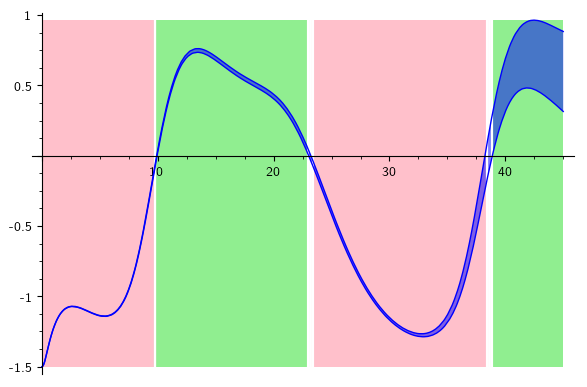

In [19]:
g.set_aspect_ratio('automatic')
g

In [20]:
#observer = PolyObserver(at.p, r)

In [21]:
#observer.roots()

In [22]:
#r = s.reach(45)

In [23]:
observer = SageObserver(at.p, r, tentative_unpreconditioning=True)

SageObserver(x4 - 1.50000000000000, <flowstar.reachability.Reach object at 0x55edaef7ab38>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd07378>


In [24]:
observer.tentative_unpreconditioning

True

In [25]:
vector([at.p.diff(x) for x in s.x])*s.y

-0.380000000000000*x4 + x8

In [26]:
s

System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13), [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], (0, -0.300000000000000*x1 + x10, 0, 0.640000000000000*x13 - 0.560000000000000*x3, -0.380000000000000*x4 + x8, -0.680000000000000*x5 + 1.18000000000000*x9, 0, 0, -0.570000000000000*x8 + 1.50000000000000/(0.277008310249308?*x3^2.00000000000000 + 0.277008310249308?*x4^2.00000000000000 + 7.71604938271605?*x5^2.00000000000000 + 1), -0.530000000000000*x9 + 7.60000000000000/(39.06249999999999?*x1^2.00000000000000 + 0.694444444444445?*x3^2.00000000000000 + 1), -0.350000000000000*x10 + (1.50000000000000*x5^2.00000000000000/(x5^2.00000000000000 + 0.0576000000000000) + 1.30000000000000)/(18.90359168241966?*x3^2.00000000000000 + 11.11111111111111?*x4^2.00000000000000 + 1), 0, x7, -0.240000000000000*x13 + 1/(0.250000000000000*x3^2.00000000000000 + 4.72589792060492?*x5^2.00000000000000 + 1)), varmap={'Gene(cCL,tCL,dMCL,dCL,iCL;)': x0, 'Protein(dP97,iP97;)': x1, 'Gene(cEL,tEL,dMEL,dEL,i

In [27]:
observer.f

x4 - 1.50000000000000

In [28]:
observer.fprime

-0.380000000000000*x4 + x8

In [29]:
#observer.roots()

In [30]:
#g = at.visualize(s, 45, tentative_unpreconditioning=True)

In [31]:
#g.set_aspect_ratio('automatic')
#display_graphics( g )

In [32]:
at.signal_for_system(s, 45, symbolic_composition=True, tentative_unpreconditioning=False, verbosity=3)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

Signal([0.0000000000000000 .. 45.000000000000000], [([0.0000000000000000 .. 9.9156129363569843], False), ([9.9156129363593130 .. 23.120079648499346], True), ([23.120079648504034 .. 38.524047384198973], False), ([38.524047384201665 .. 45.000000000000000], True)], mask=None)

In [33]:
at.signal_for_system(s, 45, symbolic_composition=True, tentative_unpreconditioning=True, verbosity=4)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

Signal([0.0000000000000000 .. 45.000000000000000], [([0.0000000000000000 .. 44.999999999999993], True)], mask=None)

args = [1, 0.00000?, 1, 0.?e-6, 0.00000?, 0.0000?, 1, 1, 0.0000?, 0.0000?, 0.000?, 1, 0, 0.0000?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -1.50000?
args = [1, 0.0032?, 1, 0.00153?, 0.00356?, 0.0212?, 1, 1, 0.1023?, 0.5197?, 0.090?, 1, 0.06966030256856303?, 0.0691?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -1.49644?
args = [1, 0.0067?, 1, 0.00326?, 0.00759?, 0.0451?, 1, 1, 0.149?, 0.7566?, 0.132?, 1, 0.1023126732571206?, 0.1009?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -1.49241?
args = [1, 0.0129?, 1, 0.00622?, 0.0145?, 0.0857?, 1, 1, 0.203?, 1.040?, 0.186?, 1, 0.142244009141953?, 0.139?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -1.4856?
args = [1, 0.025?, 1, 0.0115?, 0.0266?, 0.1581?, 1, 1, 0.267?, 1.405?, 0.266?, 1, 0.195439630268251?, 0.187?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py

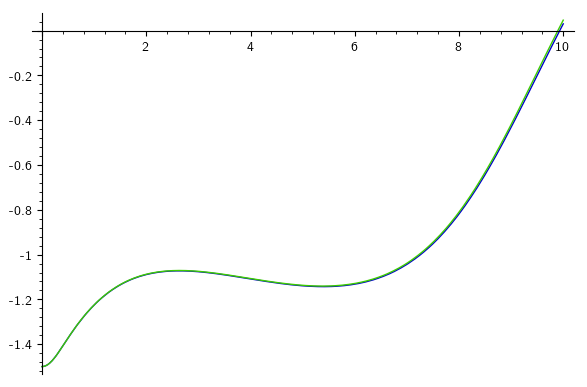

In [34]:
plot((lambda t: observer(t).lower(), lambda t: observer(t).upper()),
     (s.n('Time'), 0, 10))

In [35]:
at.signal(r, s.y, symbolic_composition=False, tentative_unpreconditioning=True, verbosity=4)

PolyObserver(x4 - 1.5000000000000000?, <flowstar.reachability.Reach object at 0x55edaef7ab38>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=4)
===
reached detect roots t=[0.0..0.0] + [0.0..0.05]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.049999999999999996..0.05] + [0.0..0.027500000000000007]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.07749999999999999..0.07750000000000001] + [0.0..0.030250000000000013]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.10774999999999998..0.10775000000000003] + [0.0..0.03327500000000002]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.14102499999999996..0.14102500000000007] + [0.0..0.018301250000000015]
not using mask!
skipping given consistent

Signal([0.0000000000000000 .. 44.998999999999996], [([0.0000000000000000 .. 9.8964197290135978], False), ([9.9329180265863392 .. 23.031135420500530], True), ([23.202165202124774 .. 38.267020206404489], False), ([38.829881638748048 .. 44.998999999999996], True)], mask=None)

In [36]:
at.signal(observer, s.y, verbosity=4, tentative_unpreconditioning=True, symbolic_composition=True)

SageObserver(x4 - 1.50000000000000, <flowstar.reachability.Reach object at 0x55edaef7ab38>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6f400>
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6f9d8>
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=4)
===
reached detect roots t=[0.0..0.0] + [0.0..0.05]
not using mask!
args = [1, 0.00?, 1, 0.000?, 0.00?, 0.0?, 1, 1, 0.0?, 0.?, 0.0?, 1, 0.1?, 0.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6f400>
y_py = -1.50?
skipping given consistent value over domain
===
reached detect roots t=[0.049999999999999996..0.05] + [0.0..0.027500000000000007]
not using mask!
args = [1, 0.01?, 1, 0.001?, 0.01?, 0.02?, 1, 1, 0.1?, 1.?, 0.1?, 1, 0.1?, 0.1?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f

Signal([0.0000000000000000 .. 44.998999999999996], [([0.0000000000000000 .. 9.8964197290135978], False), ([9.9329180265863392 .. 23.031135420500530], True), ([23.202165202124774 .. 38.267020206404489], False), ([38.829881638748048 .. 44.998999999999996], True)], mask=None)

args = [1, 5.1?, 1, 0.81?, 1.1?, 0.26?, 1, 1, 0.86?, 0.055?, 1.2?, 1, 9.00000000000?, 1.19?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -0.5?
args = [1, 5.1?, 1, 0.84?, 1.12?, 0.25?, 1, 1, 0.88?, 0.053?, 1.15?, 1, 9.09423638785?, 1.23?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -0.38?
args = [1, 5.1?, 1, 0.88?, 1.2?, 0.24?, 1, 1, 0.91?, 0.051?, 1.11?, 1, 9.21637465262?, 1.28?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -0.4?
args = [1, 5.0?, 1, 0.92?, 1.24?, 0.23?, 1, 1, 0.94?, 0.048?, 1.1?, 1, 9.36148613453?, 1.33?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -0.26?
args = [1, 5.0?, 1, 0.95?, 1.27?, 0.22?, 1, 1, 0.95?, 0.047?, 1.1?, 1, 9.42424759409?, 1.35?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fa53bd6fea0>
y_py = -0.23?
args = [1, 4.9?, 1, 0.98?, 1.4?, 0.21?, 1, 1, 0.97?, 0.045?, 1.1?, 1, 9.51735411407?, 1

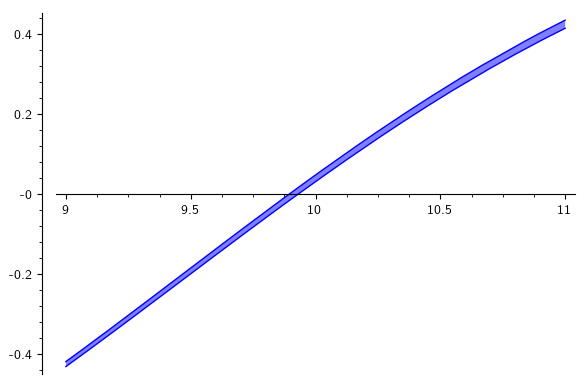

In [37]:
plot((lambda t: observer(t).lower(), lambda t: observer(t).upper()),
     (s.n('Time'), 9, 11),
     plot_points=20,
     adaptive_recursion=0,
     fillcolor='blue',
     color='blue',
     fill={0: [1]})